In [13]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

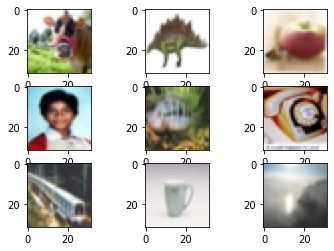

In [14]:
from matplotlib import pyplot as plt
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(100,activation='Softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               2409232   
                                                                 
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
Total params: 3,103,172
Trainable params: 3,103,172
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 21s 53ms/step - loss: 4.0719 - accuracy: 0.0851 - val_loss: 3.7845 - val_accuracy: 0.1316
Epoch 2/50
391/391 [==============================] - 21s 53ms/step - loss: 3.6756 - accuracy: 0.1459 - val_loss: 3.6592 - val_accuracy: 0.1548
Epoch 3/50
391/391 [==============================] - 20s 51ms/step - loss: 3.5132 - accuracy: 0.1742 - val_loss: 3.4994 - val_accuracy: 0.1833
Epoch 4/50
391/391 [==============================] - 22s 56ms/step - loss: 3.3775 - accuracy: 0.2000 - val_loss: 3.4597 - val_accuracy: 0.1857
Epoch 5/50
391/391 [==============================] - 24s 62ms/step - loss: 3.2794 - accuracy: 0.2173 - val_loss: 3.3538 - val_accuracy: 0.2096
Epoch 6/50
391/391 [==============================] - 26s 66ms/step - loss: 3.1925 - accuracy: 0.2318 - val_loss: 3.3113 - val_accuracy: 0.2200
Epoch 7/50
391/391 [==============================] - 22s 55ms/step - loss: 3.1080 - accuracy: 0.2457 - val_loss: 3.2729 - val_accuracy:

In [8]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

sai so kiem tra la: 5.08468770980835
do chinh xac kiem tra la: 0.25870001316070557


In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img=load_img('xehoi.jfif',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)

array([13])

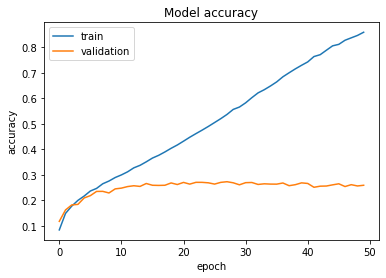

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [12]:
model.save('cifar100.h5')